# KNN

Los KVecinos mas cercanos deciden a que clase corresponde un punto por proximidad o medidas de distancia. 

La tecnica KNN es simple de implementar, y simple de entender. Dado un punto, se le pregunta a los vecinos mas cercanos con las distancia para que hagan una votación para determinar a que grupo pertenece el punto. 

Por la propia naturaleza del voto si el valor de k es par, se podria incurrir en un empate. Tambien se agregar un peso a los puntos o penalizaciónes para mejorar la clasificación.


In [49]:
import numpy as np
from sklearn import (preprocessing,
                     model_selection,
                     neighbors)

import pandas as pd

In [50]:
df = pd.read_csv('../datasets/cancer/breast-cancer-wisconsin.data.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [51]:
df[0]

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: 0, Length: 699, dtype: int64

In [52]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [53]:
# Si faltara un valor, se ponen valores muy muy negativos
df.replace("?", -9999999, inplace=True)

columns = ["id"]
for i in range(1, 10):
    columns.append(f"V{i}")
columns.append("class")

df.columns = columns
df = df.set_index('id')

In [54]:
Y = df['class']
X = df.drop('class', axis=1)

In [55]:
# KNN
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
accuracy = clf.score(X_test, y_test)

accuracy

0.9428571428571428

In [46]:
print("Clean data:", accuracy)
df = pd.read_csv('../datasets/cancer/breast-cancer-wisconsin.data.txt', header=None)
df.head()
# Si faltara un valor, se ponen valores muy muy negativos
df.replace("?", -9999999, inplace=True)

columns = ["id"]
for i in range(1, 10):
    columns.append(f"V{i}")
columns.append("class")

df.columns = columns

Y = df['class']
X = df.drop('class', axis=1)

# KNN
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print("Dirty Data", accuracy)

Clean data: 0.9642857142857143
Dirty Data 0.6357142857142857


In [57]:
# Clasificar nuevos datos
sample_measure = np.array([4,2,1,1,1,2,3,2,1]).reshape(1, -1)
clf.predict(sample_measure)

# 2: Tipo 2 venigna

C:\Users\Psyche\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [60]:
# Nuestro KNN
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from collections import Counter
from matplotlib import style

In [59]:
dataset = {
    "k":[[1,2],[2,3],[3,1]],
    "r":[[6,5],[7,7],[8,6]]
}

new_point = [5,7]


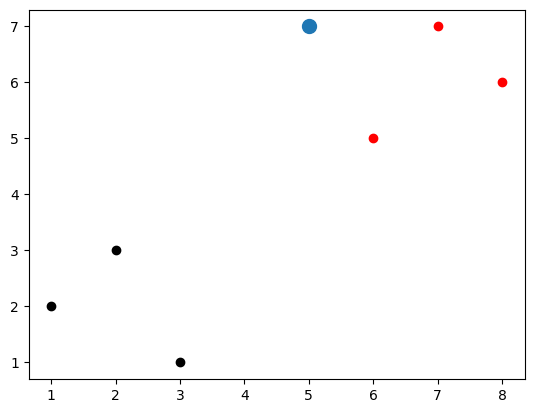

In [62]:
[[plt.scatter(ii[0], ii[1], color=i) for ii in dataset[i]] for i in dataset ]
plt.scatter(new_point[0], new_point[1], s=100)

In [65]:
def knn(data, predict, k=3):
    if len(data) >= k:
        warnings.warn("K ss menor que el numero de elementos a votar")
    
    distances = []
    for group in data:
        for feature in data[group]:
            # d = sqrt((feature[0]-predict[0])**2 + (feature[1] - predict[0])**2)
            # d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append((d, group))
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [68]:
result = knn(dataset, new_point)
result

'r'